# Data from: https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD
##  Feb 04, 2018 - Feb 04, 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Flatten, Bidirectional, Activation
# from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
df = pd.read_excel("Bitcoin_usd.xlsx", index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2019-02-04,3450.03,3470.80,3429.21,3436.52,3436.52,45471364
2019-01-25,3598.52,3607.43,3539.41,3582.89,3582.89,116674680
2019-01-24,3572.05,3616.33,3546.50,3598.52,3598.52,113155246
2019-01-23,3602.04,3631.15,3543.96,3572.05,3572.05,135864247
2019-01-22,3571.92,3635.69,3473.77,3602.04,3602.04,191355241


In [4]:
df.sort_index(ascending=True, inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2018-02-04,9251.27,9400.99,7889.83,8218.05,8218.05,1413207410
2018-02-05,8218.05,8391.29,6627.31,6937.08,6937.08,2534149181
2018-02-06,6936.43,7932.38,5968.36,7701.25,7701.25,3397596513
2018-02-07,7701.25,8572.68,7208.86,7592.72,7592.72,2159765331
2018-02-08,7593.78,8643.94,7590.48,8260.69,8260.69,1594673973


In [6]:
max(df.index)

Timestamp('2019-02-04 00:00:00')

In [7]:
min(df.index)

Timestamp('2018-02-04 00:00:00')

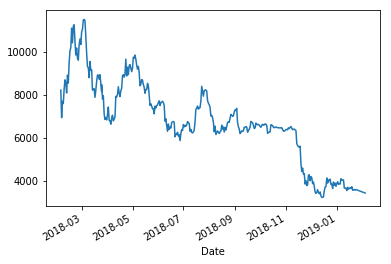

In [8]:
df.Close.plot()

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [10]:
data = df.Close.copy()

In [11]:
data.head()

Date
2018-02-04    8218.05
2018-02-05    6937.08
2018-02-06    7701.25
2018-02-07    7592.72
2018-02-08    8260.69
Name: Close, dtype: float64

In [12]:
data.reset_index(drop=True, inplace=True)

In [13]:
data.head()

0    8218.05
1    6937.08
2    7701.25
3    7592.72
4    8260.69
Name: Close, dtype: float64

In [14]:
data.isnull().sum()

0

# Define data for prediction and for training
## For training use all the data except the last 30 days.
## For eval use the last 30 days.

In [15]:
train=data.iloc[:len(df)-30]
test=data.iloc[len(train):]

In [16]:
train=np.array(train)
train=train.reshape(train.shape[0],1)

In [17]:
x_test=data[len(data)-len(test):]
x_test=x_test.values.reshape(-1,1)

## Data normalization using "MinMaxScaler"

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
train_scaled=scaler.transform(train)

In [20]:
x_test_scaled=scaler.transform(x_test)

## Rolling window 5 steps

In [21]:
timestep=5
x_test=[]
y_test=[]

for i in range(timestep,x_test_scaled.shape[0]):
    x_test.append(x_test_scaled[i-timestep:i,0])
    y_test.append(x_test_scaled[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print("x_test shape= ",x_test.shape)
print("y_test shape= ",y_test.shape)

x_test shape=  (25, 5, 1)
y_test shape=  (25,)


In [22]:
y_test= np.array(y_test)
y_test=y_test.reshape(-1, 1)
y_true=scaler.inverse_transform(y_test)

In [23]:
x_train=[]
y_train=[]

for i in range(timestep,train_scaled.shape[0]):
    x_train.append(train_scaled[i-timestep:i,0])
    y_train.append(train_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (322, 5, 1)
y_train shape=  (322,)


## Define model, compile and start training

In [24]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(128, return_sequences=True), input_shape=(x_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Bidirectional(SimpleRNN(256, return_sequences=False)))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
322/322 [==============================] - 1s 3ms/step - loss: 0.2355
Epoch 2/10
322/322 [==============================] - 0s 520us/step - loss: 0.0128
Epoch 3/10
322/322 [==============================] - 0s 542us/step - loss: 0.0030
Epoch 4/10
322/322 [==============================] - 0s 548us/step - loss: 0.0016
Epoch 5/10
322/322 [==============================] - 0s 564us/step - loss: 0.0021
Epoch 6/10
322/322 [==============================] - 0s 522us/step - loss: 0.0015
Epoch 7/10
322/322 [==============================] - 0s 521us/step - loss: 0.0026
Epoch 8/10
322/322 [==============================] - 0s 523us/step - loss: 0.0025
Epoch 9/10
322/322 [==============================] - 0s 533us/step - loss: 0.0022
Epoch 10/10
322/322 [==============================] - 0s 536us/step - loss: 0.0017


## Predictions

In [26]:
predict_bi=model.predict(x_test)
predict_bi=scaler.inverse_transform(predict_bi)

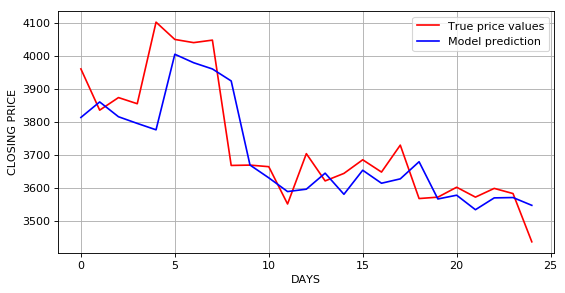

In [27]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_true,color="r",label="True price values")
plt.plot(predict_bi,color="b",label="Model prediction")
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("CLOSING PRICE")
plt.grid(True)

In [28]:
mse = mean_absolute_error(y_pred=predict_bi, y_true=y_true)
mse

73.25541289062507